In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

2024-04-04 17:56:03.354820: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = pd.read_csv('./../ejerciciosModelosSupervisados/clasificacion_profesion/datos/train.csv')

In [3]:
# pre-process datos (si es necesario)

df= df.dropna(subset=['Work_Experience','Profession','Family_Size','Graduated_Yes'])

df['Profession'] = df['Profession'].replace({
    'Healthcare':0, 
    'Engineer':1, 
    'Lawyer':2, 
    'Entertainment':3, 
    'Artist':4,
    'Executive':5, 
    'Doctor':6, 
    'Homemaker':7, 
    'Marketing':8
})

df = pd.get_dummies(df)

In [4]:
yvar = df.Profession
xvars = df[[x for x in df.columns if x != 'Profession']]

In [5]:
# dividir train / test para variables independientes (x)  y dependiente (y)
xtrain, xtest, ytrain, ytest = train_test_split(xvars, yvar, train_size = 0.80, random_state = 2)

In [6]:
# convertir datos en numpy arrays

xtrain = np.array(xtrain)
xtest= np.array(xtest)
ytrain = np.array(ytrain).squeeze()
ytest = np.array(ytest).squeeze()

In [14]:
# regression network / sequential API

model = tf.keras.Sequential([
    
    tf.keras.layers.Dense(256, kernel_regularizer='l2', activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(9, activation = 'softmax')
])

optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0002)

model.compile(optimizer=optimizer, loss='SparseCategoricalCrossentropy', metrics=['accuracy'])

In [15]:
history = model.fit(
    xtrain,
    ytrain,
    epochs=200,
    callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  verbose=2, 
                                                  min_delta=0.001, 
                                                  patience=10),
                 tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
                                                      patience=5)],
    validation_data=(xtest, ytest)
)

Epoch 1/200
171/171 [==============================] - 1s 3ms/step - loss: 2.3311 - accuracy: 0.3801 - val_loss: 1.9861 - val_accuracy: 0.4330 - lr: 2.0000e-04
Epoch 2/200
171/171 [==============================] - 0s 2ms/step - loss: 1.8941 - accuracy: 0.4578 - val_loss: 1.8177 - val_accuracy: 0.4821 - lr: 2.0000e-04
Epoch 3/200
171/171 [==============================] - 0s 2ms/step - loss: 1.7645 - accuracy: 0.4778 - val_loss: 1.7375 - val_accuracy: 0.4491 - lr: 2.0000e-04
Epoch 4/200
171/171 [==============================] - 0s 2ms/step - loss: 1.6941 - accuracy: 0.4872 - val_loss: 1.6998 - val_accuracy: 0.4564 - lr: 2.0000e-04
Epoch 5/200
171/171 [==============================] - 0s 2ms/step - loss: 1.6438 - accuracy: 0.4982 - val_loss: 1.6441 - val_accuracy: 0.4952 - lr: 2.0000e-04
Epoch 6/200
171/171 [==============================] - 0s 2ms/step - loss: 1.6129 - accuracy: 0.4998 - val_loss: 1.5979 - val_accuracy: 0.5114 - lr: 2.0000e-04
Epoch 7/200
171/171 [===================

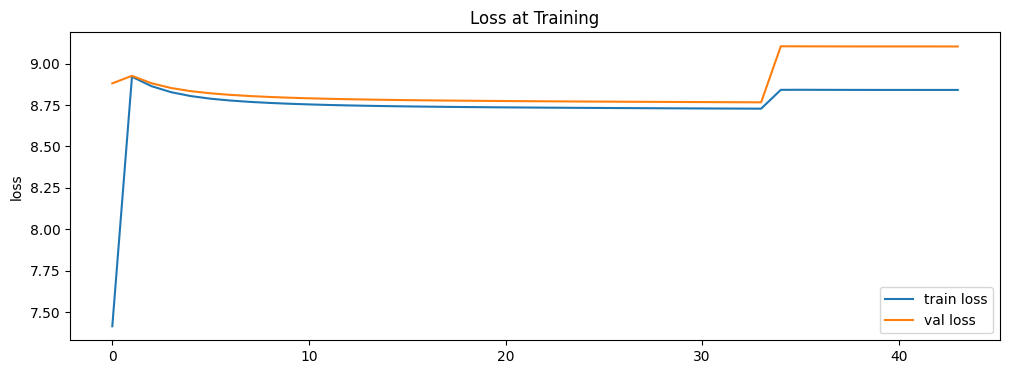

In [9]:
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(range(len(history.history['loss'])), history.history['loss'], label='train loss')
ax.plot(range(len(history.history['val_loss'])), history.history['val_loss'], label='val loss')
ax.legend()
plt.ylabel("loss")
plt.title('Loss at Training')
plt.show()